### **COCO API**

In [ ]:
!mkdir ./data
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d ./data

--2022-08-12 22:06:08--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.140.209
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.140.209|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  15.5MB/s    in 17s     

2022-08-12 22:06:26 (14.1 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: ./data/annotations/instances_train2017.json  
  inflating: ./data/annotations/instances_val2017.json  
  inflating: ./data/annotations/captions_train2017.json  
  inflating: ./data/annotations/captions_val2017.json  
  inflating: ./data/annotations/person_keypoints_train2017.json  
  inflating: ./data/annotations/person_keypoints_val2017.json  


In [ ]:
data_dir = './data'
data_type = 'val2017'
annotation_file = '{}/annotations/instances_{}.json'.format(data_dir, data_type)
print(annotation_file)

./data/annotations/instances_val2017.json


In [ ]:
!ls -lia ./data/annotations/instances_val2017.json

5636551 -rw-rw-r-- 1 root root 19987840 Sep  1  2017 ./data/annotations/instances_val2017.json


In [ ]:
!sudo apt-get install jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libjq1 libonig4
The following NEW packages will be installed:
  jq libjq1 libonig4
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 276 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libonig4 amd64 6.7.0-1 [119 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjq1 amd64 1.5+dfsg-2 [111 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jq amd64 1.5+dfsg-2 [45.6 kB]
Fetched 276 kB in 2s (176 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /us

In [ ]:
!jq . ./data/annotations/instances_val2017.json > output.json

In [ ]:
!head -30 output.json

{
  "info": {
    "description": "COCO 2017 Dataset",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2017,
    "contributor": "COCO Consortium",
    "date_created": "2017/09/01"
  },
  "licenses": [
    {
      "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
      "id": 1,
      "name": "Attribution-NonCommercial-ShareAlike License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc/2.0/",
      "id": 2,
      "name": "Attribution-NonCommercial License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc-nd/2.0/",
      "id": 3,
      "name": "Attribution-NonCommercial-NoDerivs License"
    },
    {
      "url": "http://creativecommons.org/licenses/by/2.0/",
      "id": 4,
      "name": "Attribution License"
    },


In [ ]:
!tail -30 output.json

      "id": 85,
      "name": "clock"
    },
    {
      "supercategory": "indoor",
      "id": 86,
      "name": "vase"
    },
    {
      "supercategory": "indoor",
      "id": 87,
      "name": "scissors"
    },
    {
      "supercategory": "indoor",
      "id": 88,
      "name": "teddy bear"
    },
    {
      "supercategory": "indoor",
      "id": 89,
      "name": "hair drier"
    },
    {
      "supercategory": "indoor",
      "id": 90,
      "name": "toothbrush"
    }
  ]
}


In [ ]:
!head -50300 output.json | tail -300

      "id": 220310
    },
    {
      "license": 3,
      "file_name": "000000512403.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000512403.jpg",
      "height": 640,
      "width": 529,
      "date_captured": "2013-11-24 05:12:53",
      "flickr_url": "http://farm1.staticflickr.com/143/350452845_fa743a9623_z.jpg",
      "id": 512403
    },
    {
      "license": 4,
      "file_name": "000000168974.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000168974.jpg",
      "height": 500,
      "width": 375,
      "date_captured": "2013-11-24 07:19:48",
      "flickr_url": "http://farm3.staticflickr.com/2360/2063838083_64f7514c79_z.jpg",
      "id": 168974
    },
    {
      "license": 1,
      "file_name": "000000552775.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000552775.jpg",
      "height": 500,
      "width": 375,
      "date_captured": "2013-11-24 10:38:31",
      "flickr_url": "http://farm4.staticflickr.com/3136/3106037881_9

In [ ]:
from pycocotools.coco import COCO

coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


In [ ]:
print(coco.getCatIds())

categoris = coco.loadCats(coco.getCatIds())
categoris

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]


[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [ ]:
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
print(catIds)

imgIds = coco.getImgIds(catIds=catIds)
print(imgIds)

[1, 18, 41]
[549220, 324158, 279278]


In [ ]:
image = coco.loadImgs(324158)
print(image)

image = coco.loadImgs(324158)[0]
print(image)

[{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}]
{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


In [ ]:
import urllib.request
import cv2
import matplotlib.pyplot as plt

image_url = image['coco_url']
image_path = './data/' + image['file_name']

def download_image(url, path):
  urllib.request.urlretrieve(url, path) 

download_image(image_url, image_path)
image_array = cv2.imread(image_path)
image_array_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 12))
plt.imshow(image_array_rgb)
plt.title('image_array_rgb')
plt.axis('off')
plt.show()

In [ ]:
annIds = coco.getAnnIds(imgIds=image['id'], catIds=catIds, iscrowd=None)
print(annIds)

annotations = coco.loadAnns(annIds)
annotations

[10673, 638724, 2162813]


[{'area': 759.3375500000002,
  'bbox': [196.51, 183.36, 23.95, 53.02],
  'category_id': 18,
  'id': 10673,
  'image_id': 324158,
  'iscrowd': 0,
  'segmentation': [[216.7,
    211.89,
    216.16,
    217.81,
    215.89,
    220.77,
    215.89,
    223.73,
    217.77,
    225.35,
    219.12,
    224.54,
    219.12,
    220.5,
    219.66,
    217.27,
    219.93,
    212.7,
    220.46,
    207.85,
    219.66,
    203.01,
    218.85,
    198.43,
    217.77,
    195.74,
    216.7,
    194.93,
    215.62,
    190.62,
    215.62,
    186.59,
    214.27,
    183.89,
    211.85,
    184.16,
    211.85,
    187.66,
    210.24,
    187.66,
    209.16,
    184.97,
    207.81,
    183.36,
    205.12,
    186.59,
    205.12,
    189.28,
    201.08,
    192.78,
    199.74,
    195.2,
    196.78,
    200.04,
    196.51,
    203.01,
    198.12,
    205.43,
    197.32,
    209.2,
    196.78,
    213.23,
    197.05,
    218.89,
    199.74,
    221.85,
    201.62,
    225.35,
    201.62,
    233.69,
    2

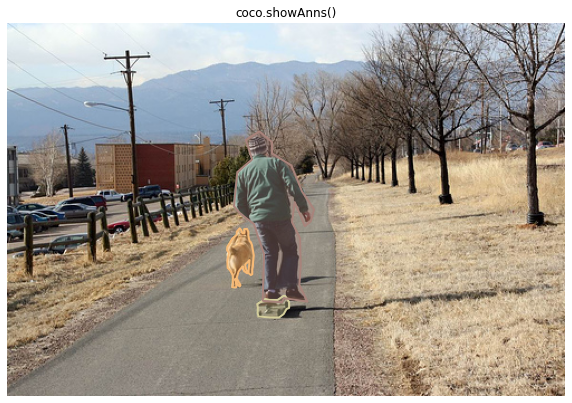

In [ ]:
plt.figure(figsize=(10, 12))
plt.imshow(image_array_rgb)
plt.title('coco.showAnns()')
plt.axis('off')

coco.showAnns(annotations)